In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import sys

sys.path.append('/content/drive/My Drive/Msc. Project Files/BoundCNN/')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from tensorflow.python.client import device_lib
import tensorflow as tf
from sklearn import svm
from itertools import product
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


tf.test.gpu_device_name()
print(device_lib.list_local_devices())

In [ ]:
x1 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/1-translocsimu-tsr_m=0.01-Unbound_1.mat')
x2 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/2-translocsimu-tsr_m=0.01-Unbound_1.mat')
x3 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/3-translocsimu-tsr_m=0.01-Unbound_1.mat')
x4 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/4-translocsimu-tsr_m=0.01-Unbound_1.mat')
x5 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/5-translocsimu-tsr_m=0.01-Unbound_1.mat')
x6 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/6-translocsimu-tsr_m=0.01-Unbound_1.mat')
x7 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/7-translocsimu-tsr_m=0.01-Unbound_1.mat')
x8 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/8-translocsimu-tsr_m=0.01-Unbound_1.mat')
x9 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/9-translocsimu-tsr_m=0.01-Unbound_1.mat')
x10 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/10-translocsimu-tsr_m=0.01-Unbound_1.mat')

y1 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/1-translocsimu-tsr_m=0.08-Bound_1.mat')
y2 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/2-translocsimu-tsr_m=0.08-Bound_1.mat')
y3 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/3-translocsimu-tsr_m=0.08-Bound_1.mat')
y4 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/4-translocsimu-tsr_m=0.08-Bound_1.mat')
y5 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/5-translocsimu-tsr_m=0.08-Bound_1.mat')
y6 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/6-translocsimu-tsr_m=0.08-Bound_1.mat')
y7 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/7-translocsimu-tsr_m=0.08-Bound_1.mat')
y8 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/8-translocsimu-tsr_m=0.08-Bound_1.mat')
y9 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/9-translocsimu-tsr_m=0.08-Bound_1.mat')
y10 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/10-translocsimu-tsr_m=0.08-Bound_1.mat')



In [ ]:
x1 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/1-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')
x2 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/2-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')
x3 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/3-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')
x4 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/4-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')
x5 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/5-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')
x6 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/6-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')
x7 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/7-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')
x8 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/8-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')
x9 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/9-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')
x10 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/10-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')

y1 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/1-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')
y2 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/2-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')
y3 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/3-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')
y4 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/4-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')
y5 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/5-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')
y6 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/6-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')
y7 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/7-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')
y8 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/8-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')
y9 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/9-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')
y10 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/10-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')

In [ ]:
ch2_Unbound1 = x1['ch2']
ch2_Unbound2 = x2['ch2']
ch2_Unbound3 = x3['ch2']
ch2_Unbound4 = x4['ch2']
ch2_Unbound5 = x5['ch2']
ch2_Unbound6 = x6['ch2']
ch2_Unbound7 = x7['ch2']
ch2_Unbound8 = x8['ch2']
ch2_Unbound9 = x9['ch2']
ch2_Unbound10 = x10['ch2']

ch2_Bound1 = y1['ch2']
ch2_Bound2 = y2['ch2']
ch2_Bound3 = y3['ch2']
ch2_Bound4 = y4['ch2']
ch2_Bound5 = y5['ch2']
ch2_Bound6 = y6['ch2']
ch2_Bound7 = y7['ch2']
ch2_Bound8 = y8['ch2']
ch2_Bound9 = y9['ch2']
ch2_Bound10 = y10['ch2']


In [ ]:
ch2_Unbound = np.concatenate((ch2_Unbound1, ch2_Unbound2, ch2_Unbound3, ch2_Unbound4, ch2_Unbound5, ch2_Unbound6, ch2_Unbound7, ch2_Unbound8, ch2_Unbound9, ch2_Unbound10), axis=0)

In [ ]:
ch2_Bound = np.concatenate((ch2_Bound1, ch2_Bound2, ch2_Bound3, ch2_Bound4, ch2_Bound5, ch2_Bound6, ch2_Bound7, ch2_Bound8, ch2_Bound9, ch2_Bound10), axis=0)

In [ ]:
ch2_Bound = ch2_Bound[ch2_Bound[:] > 0.5*pow(10, -10)] 
ch2_Unbound = ch2_Unbound[ch2_Unbound[:] > 0.5*pow(10, -10)] 

In [ ]:
print(len(ch2_Bound))
print(len(ch2_Unbound))

99758
99898


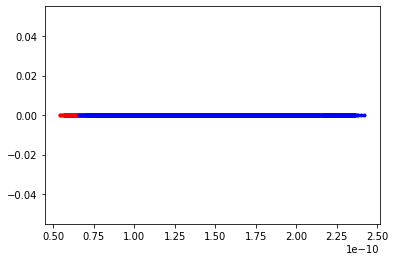

In [ ]:
yUnbound = np.zeros(99898)
yBound = np.zeros(99758)

plt.plot(ch2_Unbound,yUnbound,'r.')
plt.plot(ch2_Bound,yBound,'b.')

#axes = plt.gca()
#axes.set_xlim([-0.00000000004,0.0000000002])
#axes.set_ylim([-0.00000000001,0.00000000001])
plt.show()

In [ ]:
TotalDatas = np.concatenate((ch2_Bound, ch2_Unbound), axis=0)

In [ ]:
y_total00 = np.zeros(len(ch2_Unbound))   
y_total11 = np.ones(len(ch2_Bound))  
y_total10 = np.concatenate((y_total11, y_total00), axis=0)


In [ ]:
y_total10

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(TotalDatas, y_total10, test_size=0.2)

In [ ]:
X_train -= np.mean(X_train, axis= 0)
X_train /= np.std(X_train, axis = 0)

X_test -= np.mean(X_test, axis= 0)
X_test /= np.std(X_test, axis = 0)

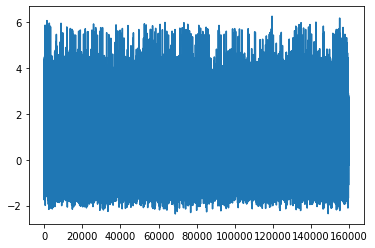

In [ ]:
plt.plot(X_train)


In [ ]:
X_train = X_train.reshape(-1, 1)

In [ ]:
X_train

In [ ]:
abc = np.c_[ X_train, pow(X_train,2) ]

In [ ]:
abc

In [ ]:
#Plot the decision boundaries of a VotingClassifier

# Copy of input matrices
X = abc
y = y_train
# Training classifiers
clfr1 = DecisionTreeClassifier(max_depth=4)
clfr2 = KNeighborsClassifier(n_neighbors=7)
clfr3 = SVC(kernel='rbf', gamma=4, C=25, probability=True)
vclfr = VotingClassifier(estimators=[('dt', clfr1), ('knn', clfr2),('svc', clfr3)],voting='soft', weights=[2, 1, 2])

clfr1.fit(X, y)
clfr2.fit(X, y)
clfr3.fit(X, y)
vclrf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
f, drawingss = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for plot_x, clf, vv in zip(product([0, 1], [0, 1]),
                        [clfr1, clfr2, clfr3, vclfr],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    drawingss[plot_x[0], plot_x[1]].contourf(xx, yy, Z, alpha=0.4)
    drawingss[plot_x[0], plot_x[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    drawingss[plot_x[0], plot_x[1]].set_title(vv)

plt.show()

In [ ]:
print(clfr1.score(X, y))
print(clfr2.score(X, y))
print(clfr3.score(X, y))
print(vclfr.score(X, y))


In [ ]:
#SVM-Kernels

# Copy of input matrices
X = abc
Y = y
numberss = 1
for kernel in ('linear', 'poly', 'rbf'):
    clfy = svm.SVC(kernel=kernel, gamma=2)
    clfy.fit(X, Y)
    j = clfy.score(X, y)
    print(j)

    plt.figure(numberss, figsize=(4, 3))
    plt.clfy()

    plt.scatter(clfy.support_vectors_[:, 0], clfy.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')
    plt.axis('tight')

    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3
    aaa, bbb = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]

    Z = clfy.decision_function(np.c_[aaa.ravel(), bbb.ravel()])
    Z = Z.reshape(aaa.shape)
    plt.figure(numberss, figsize=(4, 3))
    plt.pcolormesh(aaa, bbb, Z > 0, cmap=plt.cm.Paired)
    plt.contour(aaa, bbb, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    numberss = numberss + 1
plt.show()